# Прогнозирование   урожайности на базе машинного обучения 

In [19]:
import pandas as pd
import numpy as np
data = pd.read_csv("data_harvest_potato.csv")
data.head()

,N,P,K,temperature,humidity,ph,rainfall,harvest
0,87.061966,59.225440,56.501270,15.438161,61.188624,7.111946,309.758114,19.227750
1,87.673701,60.270827,67.905067,16.943861,56.056799,7.124829,317.056731,19.003378
2,88.548707,58.155658,62.924899,17.008231,56.348194,7.602639,320.557945,18.777324
3,89.332462,58.205528,67.702136,15.228555,59.279004,8.177541,310.698694,18.914045
4,90.966950,59.743297,56.636310,15.661283,55.958781,7.581785,316.473301,18.010575


In [20]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
harvest        0
dtype: int64

In [21]:
data = data.dropna()

In [22]:
#Все параметры
x = data.drop("harvest",axis=1)
y = data[["harvest"]]

cols = ['N','P','K','temperature','humidity','ph','rainfall']

#Выбранные параметры
x1 = data.drop(cols,axis=1)

from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x = std.fit_transform(x)
y = std.fit_transform(y)
x1 = std.fit_transform(x1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.02, random_state=71)
x1_train, x1_test, y_train, y_test = train_test_split(x1, y, test_size=0.02, random_state=71)


## СЛУЧАЙНЫЙ ЛЕС С ИСПОЛЬЗОВАНИЕМ ВСЕХ ПАРАМЕТРОВ

In [23]:
#Использование всех параметров
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)
pred_all = model.predict(x_test)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
 
print("R2score:", r2_score(y_test,pred_all))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred_all)))
print('MAE:', mean_absolute_error(y_test, pred_all))

C:\Anaconda\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


R2score: 0.07504043340762712
RMSE: 0.8679753741913638
MAE: 0.6821157246961751


### Оценка моделей.Использование выбранных параметров

In [24]:
#Использовать выбранные параметры
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x1_train,y_train)
pred_selected = model.predict(x1_test)
from sklearn.metrics import r2_score
r = r2_score(y_test,pred_selected)
print("R2score: ",r)
print('RMSE:',np.sqrt(mean_squared_error(y_test, pred_selected)))
print('MAE:',mean_absolute_error(y_test, pred_selected))

C:\Anaconda\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


R2score:  0.9999995639007226
RMSE: 0.0005959896433361708
MAE: 0.0003211838829648856


### СРАВНИТЕЛЬНАЯ ДИАГРАММА ПРОИЗВОДИТЕЛЬНОСТИ

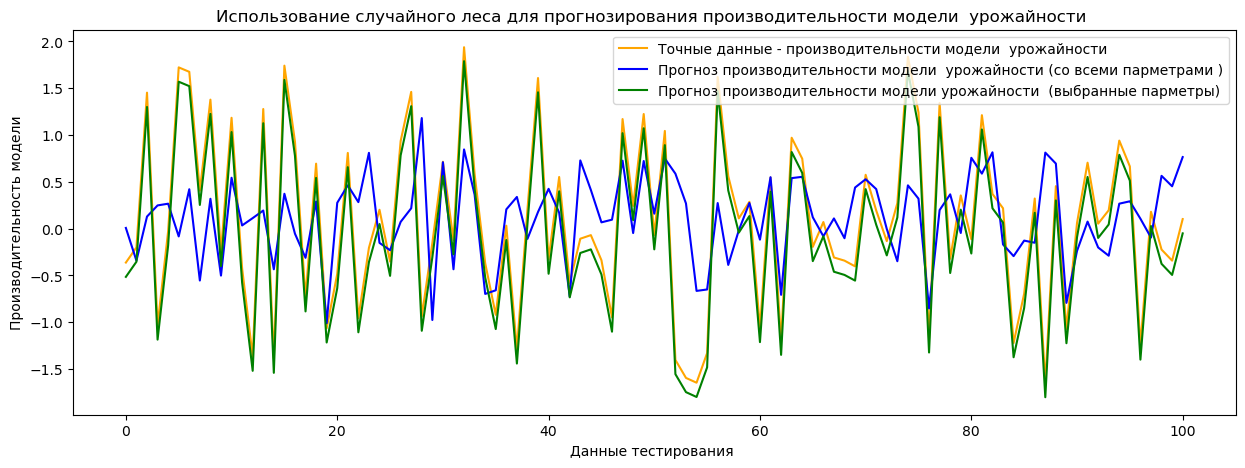

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,5))
y_test=y_test+0.1525
plt.plot(y_test, color='orange',label='Точные данные - производительности модели  урожайности  ')
plt.plot(pred_all, color='blue',label='Прогноз производительности модели  урожайности (со всеми парметрами )')
plt.plot(pred_selected, color='green',label='Прогноз производительности модели урожайности  (выбранные парметры)')
plt.title('Использование случайного леса для прогнозирования производительности модели  урожайности ')
plt.xlabel("Данные тестирования ")
plt.ylabel('Производительность модели')
plt.legend()
plt.show()

## Метод опорных векторов

### Использование всех параметров

In [26]:
#Используем все параметры
from sklearn.svm import SVR
from sklearn import metrics
svr=SVR() #Гиперпараметры по умолчанию
svr.fit(x_train,y_train)
pred_all=svr.predict(x_test)
#print('r2 Score:')
print('R2 score:',r2_score(y_test, pred_all))
print('RMSE:',np.sqrt(mean_squared_error(y_test, pred_all)))
print('MAE:',mean_absolute_error(y_test, pred_all))

C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R2 score: 0.1438710022770292
RMSE: 0.8350560619519772
MAE: 0.6812757581333994


### ИСПОЛЬЗОВАНИЕ ВЫБРАННЫХ ПАРАМЕТРОВ

In [27]:
#Использование выбранных параметров
from sklearn.svm import SVR
from sklearn import metrics
svr=SVR() #Гиперпараметры по умолчанию
svr.fit(x1_train,y_train)
pred_sel = svr.predict(x1_test)
#print('r2 Score:')
print('R2 score:',r2_score(y_test,pred_sel))
print('RMSE:',np.sqrt(mean_squared_error(y_test, pred_sel)))
print('MAE:',mean_absolute_error(y_test, pred_sel))

R2 score: 0.9852027471189414
RMSE: 0.10978337487621131
MAE: 0.09469616613244469


C:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### СРАВНИТЕЛЬНЫЙ АНАЛИЗ ПРОИЗВОДИТЕЛЬНОСТИ

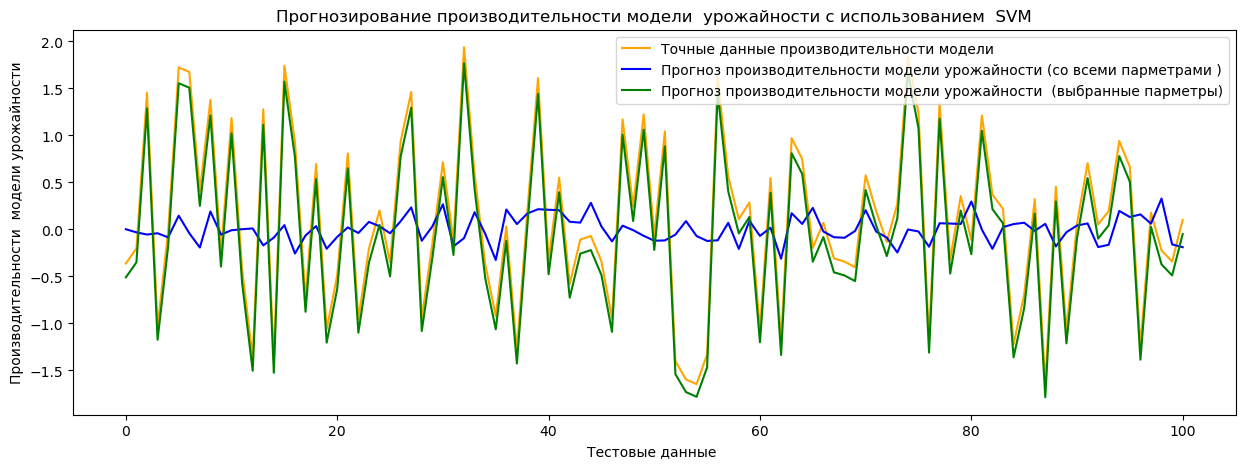

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,5))
plt.plot(y_test, color='orange',label='Точные данные производительности модели ')
plt.plot(pred_all, color='blue',label='Прогноз производительности модели урожайности (со всеми парметрами )')
plt.plot(pred_sel, color='green',label='Прогноз производительности модели урожайности  (выбранные парметры)')
plt.title('Прогнозирование производительности модели  урожайности с использованием  SVM')
plt.xlabel("Тестовые данные ")
plt.ylabel('Производительности  модели урожайности')
plt.legend()
plt.show()

## ЛАССО РЕГРЕССИЯ

### ИСПОЛЬЗОВАНИЕ ВСЕХ ПАРАМЕТРОВ 

In [29]:
#С выбором всех параметров
from sklearn.linear_model import Lasso

model_lasso = Lasso(alpha=0.01)
model_lasso.fit(x_train, y_train) 
pred_all= model_lasso.predict(x_test)

print('R2 score:',r2_score(y_test, pred_all))
print('RMSE:',np.sqrt(mean_squared_error(y_test,pred_all))) 
print('MAE:',mean_absolute_error(y_test, pred_all))

R2 score: 0.02718413408746989
RMSE: 0.8901462200595681
MAE: 0.7265576305941648


### Испльзование выбранных параметров 

In [30]:
#Использовать выбранные праметры
from sklearn.linear_model import Lasso

model_lasso = Lasso(alpha=0.01)
model_lasso.fit(x1_train, y_train) 
pred_sel= model_lasso.predict(x1_test)

print('R2 score:',r2_score(y_test, pred_sel))
print('RMSE:',np.sqrt(mean_squared_error(y_test,pred_sel))) 
print('MAE:',mean_absolute_error(y_test, pred_sel))

R2 score: 0.9716030497613702
RMSE: 0.15208342330861088
MAE: 0.1518173839826598


### СРАВНИТЕЛЬНЫЙ АНАЛИЗ ПРОИЗВОДИТЕЛЬНОСТИ

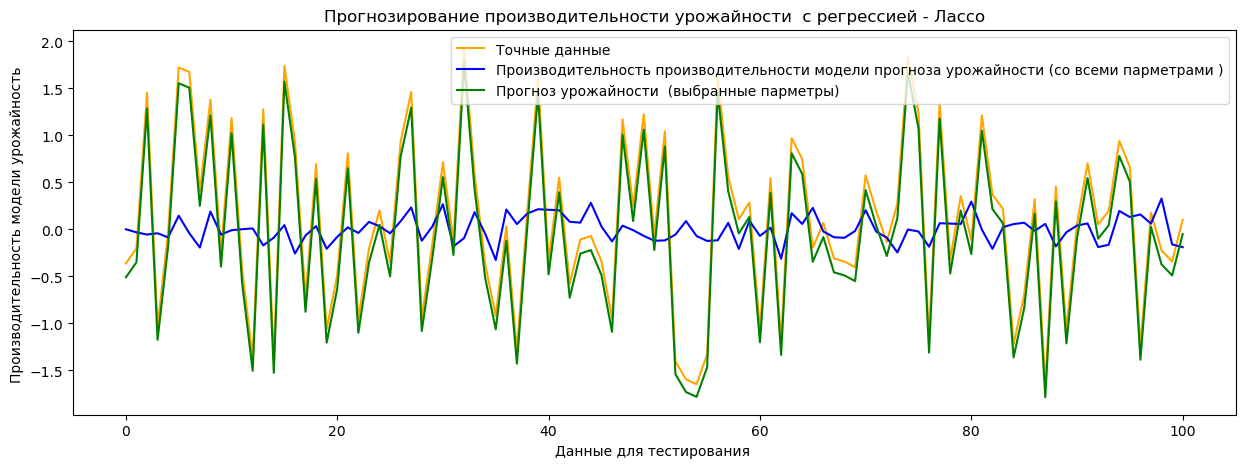

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,5))
plt.plot(y_test, color='orange',label='Точные данные ')
plt.plot(pred_all, color='blue',label='Производительность производительности модели прогноза урожайности (со всеми парметрами )')
plt.plot(pred_sel, color='green',label='Прогноз урожайности  (выбранные парметры)')
plt.title('Прогнозирование производительности урожайности  с регрессией - Лассо')
plt.xlabel("Данные для тестирования ")
plt.ylabel('Производительность модели урожайность ')
plt.legend()
plt.show()